## Introduction

In [1]:
import random

POP_SIZE = 500
MUT_RATE = 0.1
TARGET = 'arshia taheri'
GENES = ' abcdefghijklmnopqrstuvwxyz'

In [7]:
# This function returns initial population.

def initialize_pop(TARGET):
  population = list()
  tar_len = len(TARGET)

  for i in range(POP_SIZE):
      temp = list()
      for j in range(tar_len):
          temp.append(random.choice(GENES))
      population.append(temp)
  return population

In [8]:
# This function returns chromosomes along with their fitness level.

def fitness_cal(TARGET, chromo_from_pop):
  difference = 0
  for tar_char, chromo_char in zip(TARGET, chromo_from_pop):
      if tar_char != chromo_char:
          difference+=1
  return [chromo_from_pop, difference]

In [9]:
# This function returns top 50% population sorted according to fitness.

def selection(population, TARGET):
  sorted_chromo_pop = sorted(population, key= lambda x: x[1])
  return sorted_chromo_pop[:int(0.5*POP_SIZE)]

In [10]:
# This function will return a list of offspring with a lenght equal to the length of initial population.

def crossover(selected_chromo, CHROMO_LEN, population):
  offspring_cross = []
  for i in range(int(POP_SIZE)):
    parent1 = random.choice(selected_chromo)
    parent2 = random.choice(population[:int(POP_SIZE*50)])

    p1 = parent1[0]
    p2 = parent2[0]

    crossover_point = random.randint(1, CHROMO_LEN-1)
    child =  p1[:crossover_point] + p2[crossover_point:]
    offspring_cross.extend([child])
  return offspring_cross

In [11]:
# This function would return a mutated list of population.

def mutate(offspring, MUT_RATE):
  mutated_offspring = []

  for arr in offspring:
      for i in range(len(arr)):
          if random.random() < MUT_RATE:
              arr[i] = random.choice(GENES)
      mutated_offspring.append(arr)
  return mutated_offspring

In [12]:
# This function will return the best chromosomes from our initial population and new gen.

def replace(new_gen, population):
  for _ in range(len(population)):
      if population[_][1] > new_gen[_][1]:
        population[_][0] = new_gen[_][0]
        population[_][1] = new_gen[_][1]
  return population

In [13]:
def main(POP_SIZE, MUT_RATE, TARGET, GENES):
    # 1) initialize population
    initial_population = initialize_pop(TARGET)
    found = False
    population = []
    generation = 1

    # 2) Calculating the fitness for the current population
    for _ in range(len(initial_population)):
        population.append(fitness_cal(TARGET, initial_population[_]))

    # now population has 2 things, [chromosome, fitness]
    # 3) now we loop until TARGET is found
    while not found:

      # 3.1) select best people from current population
      selected = selection(population, TARGET)

      # 3.2) mate parents to make new generation
      population = sorted(population, key= lambda x:x[1])
      crossovered = crossover(selected, len(TARGET), population)

      # 3.3) mutating the childeren to diversfy the new generation
      mutated = mutate(crossovered, MUT_RATE)

      new_gen = []
      for _ in mutated:
          new_gen.append(fitness_cal(TARGET, _))

      # 3.4) replacement of bad population with new generation
      # we sort here first to compare the least fit population with the most fit new_gen

      population = replace(new_gen, population)


      if (population[0][1] == 0):
        print('Target found')
        print('String: ' + str(population[0][0]) + ' Generation: ' + str(generation) + ' Fitness: ' + str(population[0][1]))
        break
      print('String: ' + str(population[0][0]) + ' Generation: ' + str(generation) + ' Fitness: ' + str(population[0][1]))
      generation+=1

main(POP_SIZE, MUT_RATE, TARGET, GENES)

String: ['r', 'r', 'd', 's', 'm', 'w', 'p', 't', 'r', 'u', 'e', 'z', 'n'] Generation: 1 Fitness: 10
String: ['r', 'r', 'd', 's', 'm', 'w', 'p', 't', 'r', 'u', 'e', 'z', 'n'] Generation: 2 Fitness: 10
String: ['a', 'z', 's', 'i', 'i', 'c', 'b', ' ', 'a', 'e', 'e', 'a', 'o'] Generation: 3 Fitness: 8
String: ['a', 'z', 's', 'i', 'i', 'c', 'b', ' ', 'a', 'e', 'e', 'a', 'o'] Generation: 4 Fitness: 8
String: ['a', 'z', 's', 'i', 'i', 'c', 'b', ' ', 'a', 'e', 'e', 'a', 'o'] Generation: 5 Fitness: 8
String: ['x', 'r', 's', 'a', 'o', 'a', 'e', 't', 'a', 'z', 'e', 'a', 'r'] Generation: 6 Fitness: 7
String: ['a', 'r', 's', 'w', 'i', 'a', 'o', 'a', 'n', 'h', 'd', 't', 'i'] Generation: 7 Fitness: 6
String: ['a', 'r', 's', 'w', 'i', 'a', 'o', 'a', 'n', 'h', 'd', 't', 'i'] Generation: 8 Fitness: 6
String: ['a', 'r', 's', 'w', 'i', 'a', 'o', 'a', 'n', 'h', 'd', 't', 'i'] Generation: 9 Fitness: 6
String: ['a', 'r', 'k', 'h', 'n', 'g', 's', 't', 'a', 'z', 'e', 'r', 'i'] Generation: 10 Fitness: 5
String:

## Second example  - Numerical

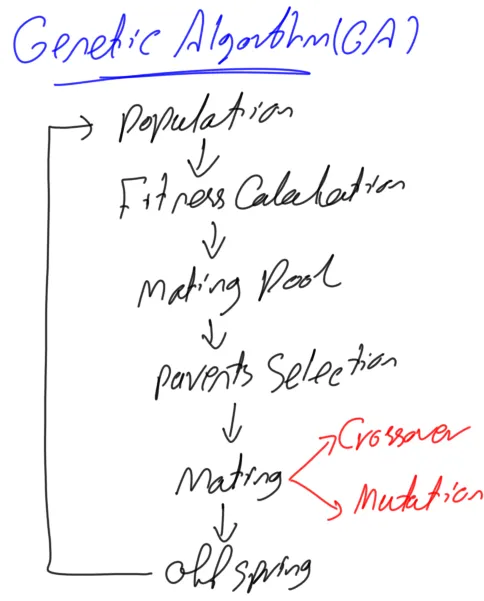

In [68]:
# Inputs of the equation.
equation_inputs = [4,-2,3.5,5,-11,-4.7]
 # Number of the weights we are looking to optimize.
num_weights = 6

In [69]:
import numpy
sol_per_pop = 8
# Defining the population size.

pop_size = (sol_per_pop,num_weights) # The population will have sol_per_pop chromosome where each chromosome has num_weights genes.

#Creating the initial population.

new_population = numpy.random.uniform(low=-4.0, high=4.0, size=pop_size)
new_population

array([[ 1.61944883,  0.4801562 , -1.070377  , -1.85068499, -3.64341971,
         3.22385309],
       [-0.47113573, -0.59667102,  2.46393081,  0.98337455,  3.83859808,
        -0.10442361],
       [-2.88508491,  1.5470557 , -3.92206941,  0.16424094, -2.93298005,
         1.62668208],
       [-3.58233734,  2.19652337,  2.17217456,  0.07776555,  2.47467581,
        -0.09956807],
       [ 1.67291294, -2.46087723,  2.52188469,  1.91151505,  0.57210084,
         2.50150315],
       [ 3.67677965, -2.84702019, -1.08268541, -1.79735716, -1.07594639,
         3.35607495],
       [-3.11105331, -2.4624049 ,  0.07562342,  1.52434469,  2.37088177,
        -3.86791555],
       [-1.92144096,  1.10830193,  0.4136118 ,  1.16113632,  2.52355004,
         1.79507279]])

In [70]:
import numpy

def cal_pop_fitness(equation_inputs, pop):
    # Calculating the fitness value of each solution in the current population.
    # The fitness function calulates the sum of products between each input and its corresponding weight.
    fitness = numpy.sum(pop*equation_inputs, axis=1)
    return fitness

def select_mating_pool(pop, fitness, num_parents):
    # Selecting the best individuals in the current generation as parents for producing the offspring of the next generation.
    parents = numpy.empty((num_parents, pop.shape[1]))
    for parent_num in range(num_parents):
        max_fitness_idx = numpy.where(fitness == numpy.max(fitness))
        max_fitness_idx = max_fitness_idx[0][0]
        parents[parent_num, :] = pop[max_fitness_idx, :]
        fitness[max_fitness_idx] = -99999999999
    return parents

def crossover(parents, offspring_size):
    offspring = numpy.empty(offspring_size)
    # The point at which crossover takes place between two parents. Usually, it is at the center.
    crossover_point = numpy.uint8(offspring_size[1]/2)

    for k in range(offspring_size[0]):
        # Index of the first parent to mate.
        parent1_idx = k%parents.shape[0]
        # Index of the second parent to mate.
        parent2_idx = (k+1)%parents.shape[0]
        # The new offspring will have its first half of its genes taken from the first parent.
        offspring[k, 0:crossover_point] = parents[parent1_idx, 0:crossover_point]
        # The new offspring will have its second half of its genes taken from the second parent.
        offspring[k, crossover_point:] = parents[parent2_idx, crossover_point:]
    return offspring

def mutation(offspring_crossover, num_mutations=1):
    mutations_counter = numpy.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    for idx in range(offspring_crossover.shape[0]):
        gene_idx = mutations_counter - 1
        for mutation_num in range(num_mutations):
            # The random value to be added to the gene.
            random_value = numpy.random.uniform(-1.0, 1.0, 1)
            offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value
            gene_idx = gene_idx + mutations_counter
    return offspring_crossover

Removed mutations_counter variable and its usage. Instead, we directly randomly select a gene index for mutation.
Removed the outer loop that iterated num_mutations times. Instead, we use a nested loop to iterate over each offspring (idx) and perform mutations inside.
Corrected the way random_value is generated.

In [65]:
def mutation(offspring_crossover, num_mutations=1):
    mutations_counter = numpy.uint8(offspring_crossover.shape[1] / num_mutations)
    # Mutation changes a number of genes as defined by the num_mutations argument. The changes are random.
    for idx in range(offspring_crossover.shape[0]):
        for _ in range(num_mutations):  # Iterate over the number of mutations
            gene_idx = numpy.random.randint(0, offspring_crossover.shape[1])  # Randomly select gene index
            # The random value to be added to the gene.
            random_value = numpy.random.uniform(-1.0, 1.0)
            offspring_crossover[idx, gene_idx] += random_value
    return offspring_crossover


In [73]:
num_generations = 10
for generation in range(num_generations):
    print("Generation : ", generation)
    # Measing the fitness of each chromosome in the population.
    fitness = cal_pop_fitness(equation_inputs, new_population)

    # Selecting the best parents in the population for mating.
    parents = select_mating_pool(new_population, fitness,
                                      num_parents_mating)

    # Generating next generation using crossover.
    offspring_crossover = crossover(parents,
                                       offspring_size=(pop_size[0]-parents.shape[0], num_weights))

    # Adding some variations to the offsrping using mutation.
    offspring_mutation = mutation(offspring_crossover)

    # Creating the new population based on the parents and offspring.
    new_population[0:parents.shape[0], :] = parents
    new_population[parents.shape[0]:, :] = offspring_mutation

    # The best result in the current iteration.
    print("Best result : ", numpy.max(numpy.sum(new_population*equation_inputs, axis=1)))

# Getting the best solution after iterating finishing all generations.
#At first, the fitness is calculated for each solution in the final generation.
fitness = cal_pop_fitness(equation_inputs, new_population)
# Then return the index of that solution corresponding to the best fitness.
best_match_idx = numpy.where(fitness == numpy.max(fitness))

print("Best solution : ", new_population[best_match_idx, :])
print("Best solution fitness : ", fitness[best_match_idx])

Generation :  0
Best result :  70.59142090649905
Generation :  1
Best result :  71.42857706309779
Generation :  2
Best result :  71.42857706309779
Generation :  3
Best result :  75.167061653187
Generation :  4
Best result :  75.167061653187
Generation :  5
Best result :  78.02479104008734
Generation :  6
Best result :  78.02479104008734
Generation :  7
Best result :  80.87872606193437
Generation :  8
Best result :  81.34223440118615
Generation :  9
Best result :  85.50511884700167
Best solution :  [[[ 1.67291294 -2.46087723  2.52188469  0.16424094 -2.93298005
   -6.80449595]]]
Best solution fitness :  [85.50511885]


<ipython-input-70-74ded5d0413a>:43: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  offspring_crossover[idx, gene_idx] = offspring_crossover[idx, gene_idx] + random_value


[Ref](https://https://towardsdatascience.com/genetic-algorithm-implementation-in-python-5ab67bb124a6)